# CHAP5 지도 학습: 회귀

- 지도 학습(Supervised Learning) : 훈련 데이터로부터 하나의 함수를 유추해내기 위한 머신러닝의 한 방법
    1. 회귀 : 입력에 대해 연속적인 값을 대응
    2. 분류 : 입력에 대해 순서가 없는 클래스(라벨)를 대응

## 5.1 1차원 입력 직선 모델
eg) 나이 $x$와 키 $t$가 세트로 된 16인분 데이터를 세로 벡터로 가지고 있다. $x=\begin{bmatrix}x_0\\x_1\\ \vdots \\x_n\\ \vdots \\x_{N-1}\\ \end{bmatrix}, t=\begin{bmatrix}t_0\\t_1\\ \vdots \\t_n\\ \vdots \\t_{N-1}\\ \end{bmatrix}$

- N은 인원수를 나타내며, N=16.

- $x_n$ : 입력 변수, $t_n$ : 목표 변수(대상), $n$ : 개인을 나타내는 데이터의 인덱스

- 데이터베이스에 없는 사람의 나이에 대해 그 사람의 키 t를 예측하는 방법 ? $\downarrow$

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


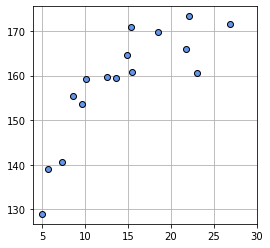

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ---- 데이터 생성 ----
np.random.seed(seed=1) # 난수 고정
X_min = 4 # X의 하한 (표시 용)
X_max = 30 # X의 상한 (표시 용)
X_n = 16 # X의 상한 (표시 용)
X = 5 + 25*np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X) + 4*np.random.randn(X_n) # X에서 T를 결정
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # 생성한 데이터를 'ch5_data.npz'에 저장
print(np.round(X, 2))
print(np.round(T, 2))

# ---- 데이터 그래프 ----
plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

### 5.1.1 직선 모델
위의 그래프에서 어느정도 오차를 허용하여 직선의 방정식을 그린다면, 새로운 나이 데이터에 대한 키를 구할 수 있을 것이다.

$$y(x)=w_0x+w_1 [직선 모델]$$

<center>( 기울기를 나타내는 $w_0$과 절편을 나타내는 $w_1$에 값을 대입. 입력 $x$에 $y(x)$를 출력하는 함수로 볼 수 있음. )
<center>( $y(x)$는 $x$에 대한 $t$의 예측치로 간주 가능. )

### 5.1.2 제곱 오차 함수
- **평균 제곱 오차 mean square error, MSE** : 직선과 데이터 점의 차의 제곱의 평균.
$$오차 J = \frac{1}{N}\sum_{n=0}^{N-1}{y_n-t_n}^2 \newline (y_n=y(x_n)=w_0x_n+w_1)$$


- 제곱 합계 오차 sum-of-squares error : 직선과 데이터 점의 차의 제곱. N으로 나누지 않음 $\leftarrow$ MSE와 다르게 오차의 크기가 N에 의존적.


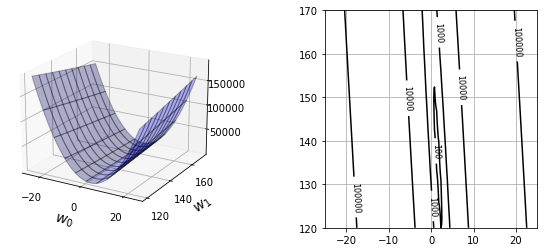

In [3]:
from mpl_toolkits.mplot3d import Axes3D
# ---- 평균 오차 함수 ----
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y-t)**2)
    return mse

# ---- 계산 ----
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25] # 직선의 절편을 나타내는 w_1. 120cm ~ 170cm(50) 범위 지정
w1_range = [120, 170] # 직선의 기울기를 나타내는 w_0. -25 ~ 25(50) 범위 지정
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
        
# ---- 표시 ----
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()
# 3D 그래프 : J가 w_0 방향 변화에 민감하게 반응하는 것을 관찰 가능. but, w_1 변화는 잘 알기 어렵다.
# -> 등고선 그래프 : w_1 방향 변화를 알아볼 수 있음. => w_0 = 3, w_1 = 135 근처에서 최솟값

### 5.1.3 매개 변수 구하기(경사 하강법)
- **경사 하강법 steepest descent method** : 1차 근삿값 발견용 최적화 알고리즘. 함수의 기울기를 구하여 기울기가 낮은 쪽으로 계속 이동시켜, **극값**에 이를 때까지 반복하는 것.


- 어느 지점 $(w_0, w_1)$에 서서 주위를 둘러봤을 때, 언덕 위쪽 방향은 벡터 $\begin{bmatrix}\frac{\partial J}{\partial w_0}&\frac{\partial J}{\partial w_1}\end{bmatrix}^T$ ($J$의 기울기 = $\nabla wJ$)


- $J$ 최소화를 위해 : $-\nabla wJ = -\begin{bmatrix}\frac{\partial J}{\partial w_0}&\frac{\partial J}{\partial w_1}^T\end{bmatrix}$로 진행한다.


$$w(t+1) = w(t) - \alpha \nabla wJ|_{w(t)}$$


- 위 학습 법칙 식을 성분 표기로 나타내면 (현재의 $w$의 값 $w(t)$를 대입한 값을 $\nabla wJ|_{w(t)}$, $\alpha$ : 학습율)
$\begin{cases} w_0(t+1) = w_0(t) - \alpha \frac{\partial J}{\partial w_0}|_{w_0(t),w_1(t)} \\ w_1(t+1) = w_1(t) - \alpha \frac{\partial J}{\partial w_1}|_{w_0(t),w_1(t)} \end{cases}$


- $\frac{\partial J}{\partial w_0} = \frac{2}{N}\sum_{n=0}^{N-1}{(w_0x_n+w_1-t_n)}x_n = \frac{2}{N}\sum_{n=0}^{N-1}{(y_n-t_n)}x_n$


- $\frac{\partial J}{\partial w_1} = \frac{2}{N}\sum_{n=0}^{N-1}{(w_0x_n+w_1-t_n)} = \frac{2}{N}\sum_{n=0}^{N-1}{(y_n-t_n)}$

In [4]:
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2*np.mean((y-t)*x)
    d_w1 = 2*np.mean(y-t)
    return d_w0, d_w1

d_w = dmse_line(X, T, [10, 165]) # w = [10, 165]에서의 기울기
print(np.round(d_w, 1)) # 차례대로 w_0 , w_1 방향의 기울기를 나타냄.

[5046.3  301.8]


반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


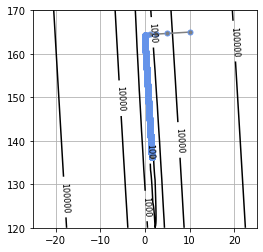

In [5]:
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료할 기울기 절댓값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i-1])
        w_i[i, 0] = w_i[i-1, 0] - alpha*dmse[0]
        w_i[i, 1] = w_i[i-1, 1] - alpha*dmse[1]
        if max(np.absolute(dmse)) < eps:
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i


plt.figure(figsize=(4, 4))
xn = 100
x0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

# 경사하강법 ---------------------------------
W0, W1, dMSE, W_history = fit_line_num(X, T)
# 결과보기 ----------------------------------
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-', color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

# 가파른 계곡으로 진행하여 골짜기에 정착하면, 계곡 중앙 부분에 천천히 나아간다. (최종 도착지 : 1.53, 136.17)

w0=1.540, w1=136.176
SD=7.002 cm


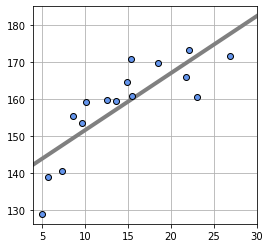

In [6]:
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0]*xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)
    
plt.figure(figsize=(4, 4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

# 직선의 식 -> y = w_0*x + w_1 (w_0=1.5, w_1=136.1)

- 평균 제곱 오차의 제곱근 : 표준 편차 ($\sqrt{49} = 7$)

ex) 오차가 대략 7cm = 오차가 정규 분포를 따른다고 가정했을 때, 전체 68% 데이터의 오차가 7cm 이하이다.

- 여러 함몰 지점(극솟값)을 가진 경우, 경사 하강법으로 항상 최솟값을 내는 것은 아니다. (여러 초기값으로 시도하여 구할 수 있음.)

### 5.1.4 선형 모델 매개 변수의 해석해
- 수치해 : 반복 계산에 의해 근사값을 구하는 수치 계산법을 사용하는 풀이 (eg 경사 하강법)
- 해석해 : 방정식을 해결하여 정확한 해를 구하는 풀이 (eg 직선의 경우 방정식을 풀어 해를 구할 수 있음)

**해석해 구하기**
- $J$가 극소화되는 지점 $w$을 찾아야 함 -> $\frac{\partial J}{\partial w_0} = 0, \frac{\partial J}{\partial w_1} = 0$인 $w_0, w_1$ 찾기

(1) $\frac{\partial J}{\partial w_0} = \frac{2}{N}\sum_{n=0}^{N-1}{(w_0x_n+w_1-t_n)}x_n = 0$

$\Rightarrow \frac{1}{N}\sum_{n=0}^{N-1}{w_0{x_n}^2} + \frac{1}{N}\sum_{n=0}^{N-1}{w_1x_n} - \frac{1}{N}\sum_{n=0}^{N-1}{t_nx_n} = w_0\frac{1}{N}\sum_{n=0}^{N-1}{{x_n}^2} + w_1\frac{1}{N}\sum_{n=0}^{N-1}{x_n} - \frac{1}{N}\sum_{n=0}^{N-1}{t_nx_n} = 0$
    
    - 위 식의 1항은 입력 데이터 $x$의 제곱의 평균을 나타내고, 2항은 입력 데이터 $x$의 평균, 3항은 목표 및 입력 데이터의 곱의 평균을 나타냄!
    
$\Rightarrow <x^2>=\frac{1}{N}\sum_{n=0}^{N-1}{{x_n}^2}, <x>=\frac{1}{N}\sum_{n=0}^{N-1}{x_n}, <tx>=\frac{1}{N}\sum_{n=0}^{N-1}{t_nx_n}$
    
$$\Rightarrow w_0<x^2>+w_1<x>-<tx>=0$$


(2) $\frac{\partial J}{\partial w_1} = \frac{2}{N}\sum_{n=0}^{N-1}{(w_0x_n+w_1-t_n)} = 0$

$$\Rightarrow w_0<x>+w_1-<t>=0$$

(3) 두 식 연립. $w_0 = \frac{<tx>-<t><x>}{<x^2>-<x>^2}$,   $w_1 = <t>-\frac{<tx>-<t><x>}{<x^2>-<x>^2}<x>$. $\leftarrow w$의 해석해

w0=1.558, w1=135.872
SD=7.001 cm


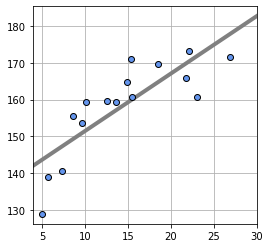

In [7]:
# 해석해 ----------------------------------------
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt*mx) / (mxx - mx**2)
    w1 = mt - w0*mx
    return np.array([w0, w1])

# 메인 ------------------------------------------
W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

## 5.2 2차원 입력면 모델
- 입력이 2차원인 경우 : $x=(x_0, x_1). 나이에 몸무게 정보도 사용하여 키를 예측해보자.$
1. 몸무게 데이터 만들기
    - 체질량 지수를 평균 23이라 가정하여 $몸무게 = 23\times\frac{키^2}{100}+노이즈$

In [10]:
# 2차원 데이터 생성 (나이 - X0, 몸무게 - X1)
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23 * (T/100)**2 + 2*np.random.randn(X_n)
X1_min = 40
X1_max = 75

print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


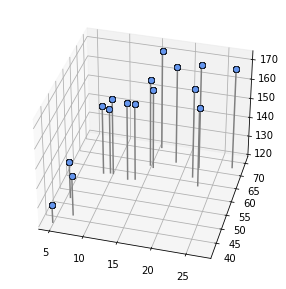

In [12]:
# 2차원 데이터 표시 -------------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)

# 메인 -----------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

### 5.2.1 데이터의 표시 방법
- 데이터의 번호 : n
- 벡터 요소(0=나이, 1=몸무게) 번호 : m
eg) $x_{nm}$ : 데이터 번호가 n이고, 요소 번호가 m(if 1, 몸무게를 뜻함)이다.

### 5.2.2 면 모델
- 위 데이터에 면을 적용하면 새로운 $x=[x_0, x_1]$에 대해 t의 예측이 가능하다.

SD=12.876 cm


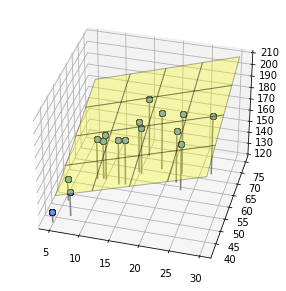

In [15]:
# 면의 표시 ------------------------------- 식 : y(x) = w_0 * x_0 + w_1 * x_1 + w_2
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1]*px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='yellow', edgecolor='black')
    
# 면의 MSE -------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0]*x0 + w[1]*x1 + w[2]
    mse = np.mean((y-t)**2)
    return mse

# 메인 -----------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()

### 5.2.3 매개 변수의 해석해
- 데이터에 가장 적합한 $w=[w_0, w_1, w_2] 구하기 : $ 평균 제곱 오차
$J=\frac{1}{N}\sum_{n=0}^{N-1}{(y(x_n)-t_n)^2}=\frac{1}{N}\sum_{n=0}^{N-1}{(w_0x_{n,0}+w_1x_{n,1}+w_2-t_n)^2}$

**해석해 구하기**

(1) $\frac{\partial J}{\partial w_0}=\frac{2}{N}\sum_{n=0}{N-1}{(w_0x_{n,0}+x_1x_{n,1}+w_2-t_n)}x_{n,0}\newline
= 2\lbrace{w_0<{x_0}^2>+w_1<{x_0x_1}^2>+w_2<x_0>-<tx_0>}\rbrace = 0$

(2) $\frac{\partial J}{\partial w_1}=\frac{2}{N}\sum_{n=0}{N-1}{(w_0x_{n,0}+x_1x_{n,1}+w_2-t_n)}x_{n,1}\newline
= 2\lbrace{w_0<{x_0x_1}>+w_1<{x_1}^2>+w_2<x_1>-<tx_1>}\rbrace = 0$

(3) $\frac{\partial J}{\partial w_0}=\frac{2}{N}\sum_{n=0}{N-1}{(w_0x_{n,0}+x_1x_{n,1}+w_2-t_n)}\newline
= 2\lbrace{w_0<{x_0}>+w_1<{x_1}>+w_2<x_1>-<t>}\rbrace = 0$



$$\Rightarrow w_0 = \frac{cov(t,x_1)cov(x_0,x_1)-var(x_1)cov(t,x_0)}{cov(x_0,x_1)^2-var(x_0)var(x_1)}$$

$$\Rightarrow w_1 = \frac{cov(t,x_0)cov(x_1,x_1)-var(x_0)cov(t,x_1)}{cov(x_0,x_1)^2-var(x_0)var(x_1)}$$

$$\Rightarrow w_2 = -w_0<x_0>-w_1<x_1>+<t>$$

- a의 분산 $var(a)=<a^2>-<a>^2$ : a와 얼마나 차이가 있는지
- a와 b의 공분산 $cov(a,b)=<ab>-<a><b>$ : a와 b가 서로 얼마나 영향을 끼치고 있는지

w0=0.5, w1=1.1, w2=1.1
SD=2.546 cm


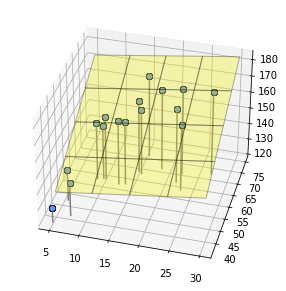

In [18]:
# 해석해 ---------------------------------------------
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t*x0) - np.mean(t)*np.mean(x0)
    c_tx1 = np.mean(t*x1) - np.mean(t)*np.mean(x1)
    c_x0x1 = np.mean(x0*x1) - np.mean(x0)*np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1*c_x0x1 - v_x1*c_tx0) / (c_x0x1**2 - v_x0*v_x1)
    w1 = (c_tx0*c_x0x1 - v_x0*c_tx1) / (c_x0x1**2 - v_x0*v_x1)
    w2 = -w0*np.mean(x0) - w1*np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2])

# 메인 ----------------------------------------------
plt.figure(figsize=(6,5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={1:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show() # 오차의 표준 편차가 지난번 모델보다 줄어듦 -> 몸무게 정보가 함께 있는것이 예측 정확도가 증가한다.

## 5.3 D차원 선형 회귀 모델